In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [4]:
x = pd.DataFrame(data['data'],columns=data['feature_names'])
y = pd.Series(data['target']).map({0:'malignant', 1:'benign'})

In [5]:
#dikarenakan metode ini menggunakan feature extraction, maka dilakukan standardscaler

# StandarScaler

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()


In [8]:
scaler_transformer=scaler.fit(x)

In [9]:
x_scaled=scaler_transformer.transform(x)

In [10]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)


# Modelling Without PCA

In [11]:
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [12]:
X_train, X_test, y_train, y_test=tts(x_scaled, y, random_state=101)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
prediction=log_model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      benign       0.99      1.00      0.99        88
   malignant       1.00      0.98      0.99        55

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
cv_score = cross_val_score(LogisticRegression(), x_scaled, y, cv=4)
cv_score.mean()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9771619225844578

# Modelling with PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
x_pca_2 = pca.fit_transform(x_scaled)

In [17]:
x_pca_2 = pd.DataFrame(x_pca_2,columns=['PCA 1', 'PCA 2'])

In [18]:
cv_score=cross_val_score(LogisticRegression(),x_pca_2, y, cv=4)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
cv_score.mean()

0.9525755934206639

# Find Best N PCA

In [20]:
cv_scores =[]
for item in range(1,11):
    x_pca=PCA(n_components=item).fit_transform(x_scaled)
    cv_mean=cross_val_score(LogisticRegression(),x_pca,y,cv=4).mean()
    cv_scores.append(cv_mean)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

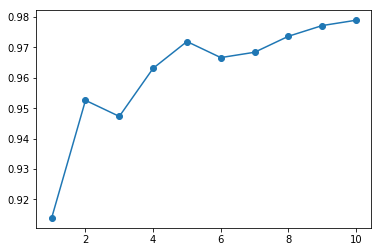

In [21]:
plt.plot([1,2,3,4,5,6,7,8,9,10],cv_scores,marker='o')

# Modelling with 10 n_components *best pca

In [22]:
pca =PCA(n_components=10)

In [23]:
pca_transformer = pca.fit(x_scaled)

In [24]:
x_pca_10 = pca_transformer.transform(x_scaled)

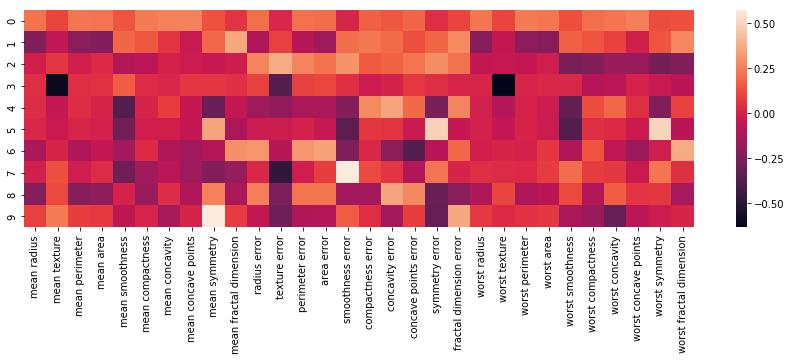

In [25]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.DataFrame(pca_transformer.components_,columns=x.columns))

In [26]:
df_pca=pd.DataFrame(x_pca_10)

In [27]:
df_pca['target']=y

In [28]:
df_pca.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'target'], dtype='object')

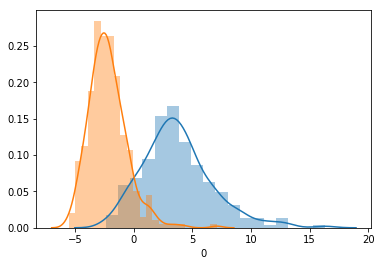

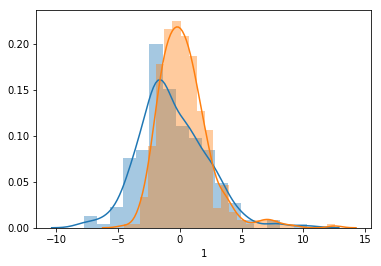

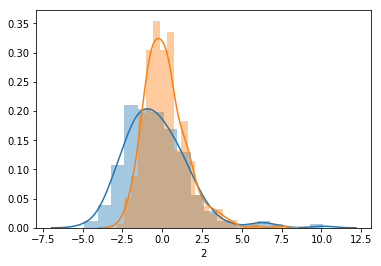

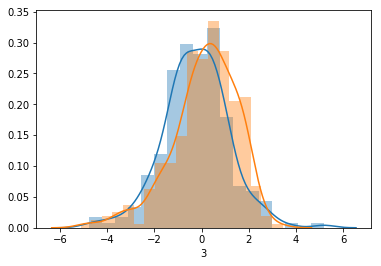

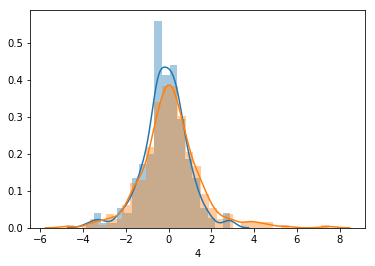

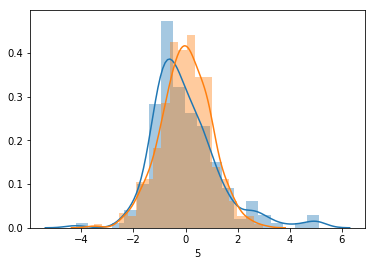

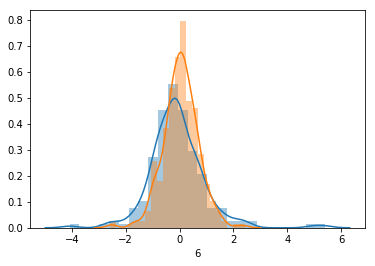

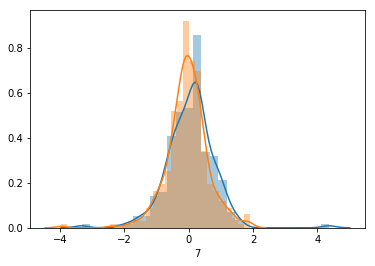

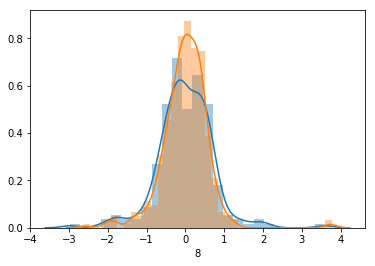

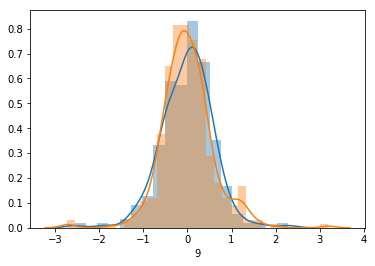

In [29]:
for col in df_pca.drop('target', axis=1).columns:
    fig,ax=plt.subplots(nrows=1,ncols=1)
    sns.distplot(df_pca[df_pca['target']=='malignant'][col], ax=ax)
    sns.distplot(df_pca[df_pca['target']=='benign'][col], ax=ax)
    plt.show()

In [30]:
X_train,X_test, y_train,y_test=tts(x_pca_10,y,random_state=101)

In [31]:
log_model_pca_10=LogisticRegression().fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
prediction=log_model_pca_10.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99        88
   malignant       0.98      0.98      0.98        55

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [33]:
new_data=x.iloc[0]

In [34]:
#Standardscaler
#pca to 10
new_data=list(new_data)

In [35]:
new_data_scaled = scaler_transformer.transform([new_data])

In [36]:
new_data_pca_10 = pca_transformer.transform(new_data_scaled)

In [37]:
log_model_pca_10.predict(new_data_pca_10)

array(['malignant'], dtype=object)

In [38]:
y.iloc[0]

'malignant'